<a href="https://colab.research.google.com/github/Niteshmeena9672/3D-Portfolio/blob/main/Bearing_Fault_Diagnosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apparatus & Procedures





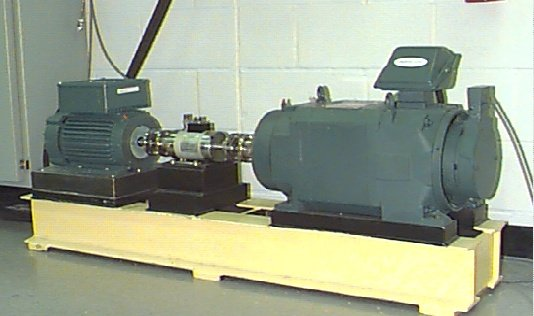

The test setup consists of:

- 2 hp motor
- Torque transducer/encoder
- Dynamometer
- Control electronics (not shown)

Test bearings support the motor shaft, with single point faults introduced using electro-discharge machining:
- Fault diameters: 7 mils, 14 mils, 21 mils, 28 mils, and 40 mils (1mil = 0.001 inches)
- SKF bearings used for 7, 14, and 21 mils; NTN equivalent for 28 and 40 mils

Vibration data collected via accelerometers:
- Positioned at 12 o’clock on drive and fan ends
- Some experiments included accelerometer on motor supporting base plate
- Recorded using a 16-channel DAT recorder, processed in Matlab
- Data format: Matlab (*.mat)
- Sampling rate: 12,000 samples per second, 48,000 for drive end bearing faults

Speed and horsepower data obtained from torque transducer/encoder, recorded manually.

Outer raceway fault placement:
- 3 o’clock: Within load zone
- 6 o’clock: Orthogonal to load zone
- 12 o’clock

## Dataset Link
[Case Western Reserve University - Bearing Data Center](https://engineering.case.edu/bearingdatacenter/download-data-file)




# Data Preprocessing

In [ ]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/3hp_load_48_KHz"

# List contents of the directory
for file_name in os.listdir(directory):
    path = os.path.join(directory, file_name)
    print(path)


/content/drive/MyDrive/3hp_load_48_KHz/14_IR.mat
/content/drive/MyDrive/3hp_load_48_KHz/14_BA.mat
/content/drive/MyDrive/3hp_load_48_KHz/7_IR.mat
/content/drive/MyDrive/3hp_load_48_KHz/21_OR2.mat
/content/drive/MyDrive/3hp_load_48_KHz/14_OR1.mat
/content/drive/MyDrive/3hp_load_48_KHz/7_OR3.mat
/content/drive/MyDrive/3hp_load_48_KHz/21_OR1.mat
/content/drive/MyDrive/3hp_load_48_KHz/21_IR.mat
/content/drive/MyDrive/3hp_load_48_KHz/7_OR1.mat
/content/drive/MyDrive/3hp_load_48_KHz/7_BA.mat
/content/drive/MyDrive/3hp_load_48_KHz/21_BA.mat
/content/drive/MyDrive/3hp_load_48_KHz/21_OR3.mat
/content/drive/MyDrive/3hp_load_48_KHz/N.mat
/content/drive/MyDrive/3hp_load_48_KHz/7_OR2.mat


In [ ]:
path = r'/content/drive/MyDrive/3hp_load_48_KHz/7_OR3.mat'
mat = scipy.io.loadmat(path)

In [ ]:
mat.items()
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X164_DE_time',
 'X164_FE_time',
 'X164RPM']

## Merging vibration signals with corresponding faults

Explanation:

The code begins by importing necessary libraries: os for operating system functionalities, scipy.io for loading MATLAB files, pandas for DataFrame operations, and numpy for numerical computations.
An empty DataFrame df is created with columns 'DE_data' and 'fault'.
The code traverses through the specified directory and its subdirectories using os.walk().
Inside the loop, it iterates over the files in each directory.
For each file, it loads data from the MATLAB file using scipy.io.loadmat().
It identifies the key name in the loaded MATLAB file to extract data.
It creates an array of faults with the same length as the data (DE_data) using the file name without extension.
A temporary DataFrame df_temp is created with columns 'DE_data' and 'fault'.
The temporary DataFrame is concatenated with the main DataFrame df.
Finally, the main DataFrame df is written to a CSV file named '3hp_all_faults.csv' using to_csv() method.

In [ ]:
import os
import scipy.io
import pandas as pd
import numpy as np

# Create an empty DataFrame with columns 'DE_data' and 'fault'
df = pd.DataFrame(columns=['DE_data', 'fault'])

# Traverse through the directory and its subdirectories
for root, dirs, files in os.walk(directory, topdown=False):
    for file_name in files:
        # Get the full path of the file
        path = os.path.join(root, file_name)
        print(path)

        # Load data from MATLAB file
        mat = scipy.io.loadmat(path)

        # Retrieve the key name from the MATLAB file
        key_name = list(mat.keys())[3]

        # Extract data associated with the key
        DE_data = mat.get(key_name)

        # Create an array of faults with the same length as DE_data, using the file name without extension
        fault = np.full((len(DE_data), 1), file_name[:-4])

        # Create a temporary DataFrame with 'DE_data' and 'fault' columns
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})

        # Concatenate the temporary DataFrame with the main DataFrame
        df = pd.concat([df, df_temp], axis=0)
        print(df['fault'].unique())

# Write the DataFrame to a CSV file named '3hp_all_faults.csv'
df.to_csv('3hp_all_faults.csv', index=False)


/content/drive/MyDrive/3hp_load_48_KHz/14_IR.mat
['14_IR']
/content/drive/MyDrive/3hp_load_48_KHz/14_BA.mat
['14_IR' '14_BA']
/content/drive/MyDrive/3hp_load_48_KHz/7_IR.mat
['14_IR' '14_BA' '7_IR']
/content/drive/MyDrive/3hp_load_48_KHz/21_OR2.mat
['14_IR' '14_BA' '7_IR' '21_OR2']
/content/drive/MyDrive/3hp_load_48_KHz/14_OR1.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1']
/content/drive/MyDrive/3hp_load_48_KHz/7_OR3.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1' '7_OR3']
/content/drive/MyDrive/3hp_load_48_KHz/21_OR1.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1' '7_OR3' '21_OR1']
/content/drive/MyDrive/3hp_load_48_KHz/21_IR.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1' '7_OR3' '21_OR1' '21_IR']
/content/drive/MyDrive/3hp_load_48_KHz/7_OR1.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1' '7_OR3' '21_OR1' '21_IR' '7_OR1']
/content/drive/MyDrive/3hp_load_48_KHz/7_BA.mat
['14_IR' '14_BA' '7_IR' '21_OR2' '14_OR1' '7_OR3' '21_OR1' '21_IR' '7_OR1'
 '7_BA']
/content/drive/MyDrive/3hp_load_48_KHz/2

In [ ]:
df = pd.read_csv('/content/3hp_all_faults.csv')
df

,DE_data,fault
0,0.001252,14_IR
1,-0.028379,14_IR
2,-0.056340,14_IR
3,-0.057592,14_IR
4,-0.045907,14_IR
...,...,...
6816991,-0.322519,7_OR2
6816992,-0.493167,7_OR2
6816993,-0.578699,7_OR2
6816994,-0.570563,7_OR2


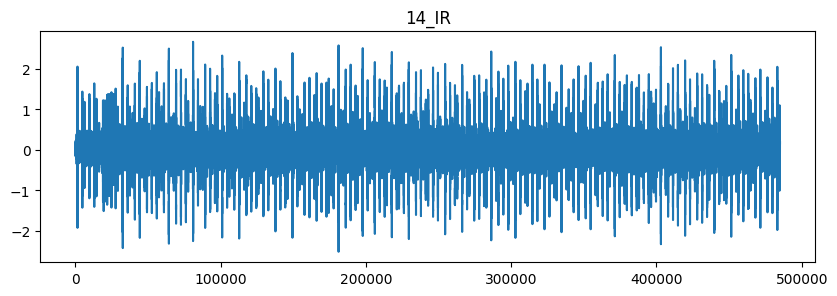

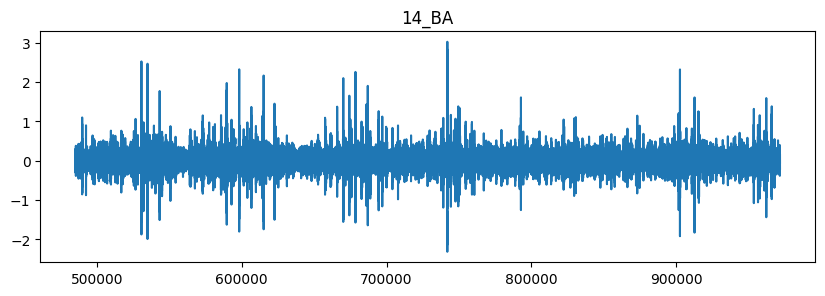

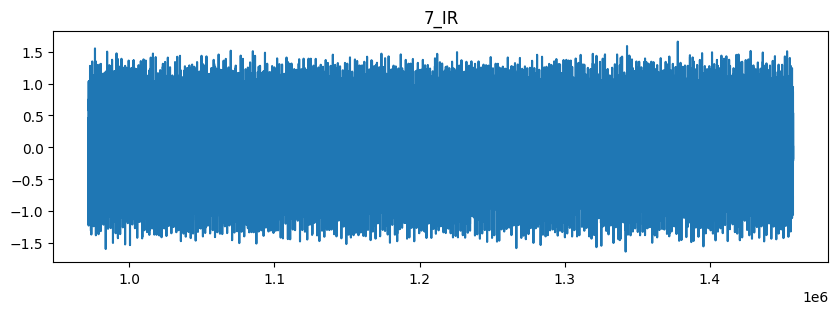

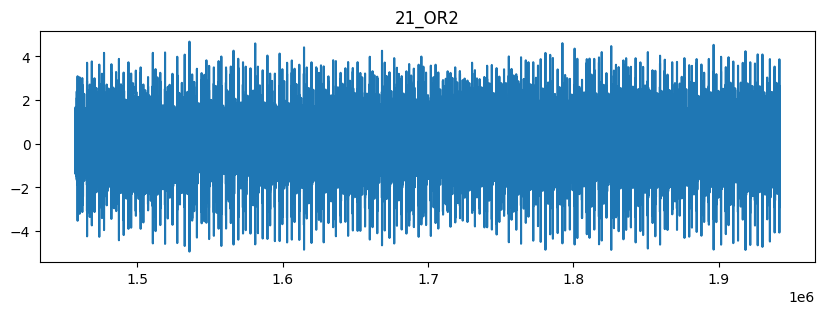

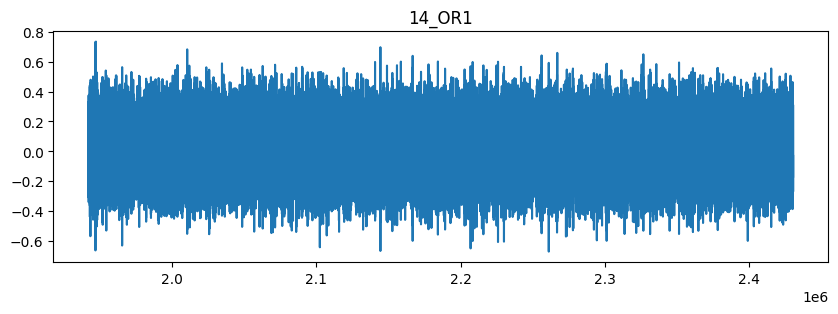

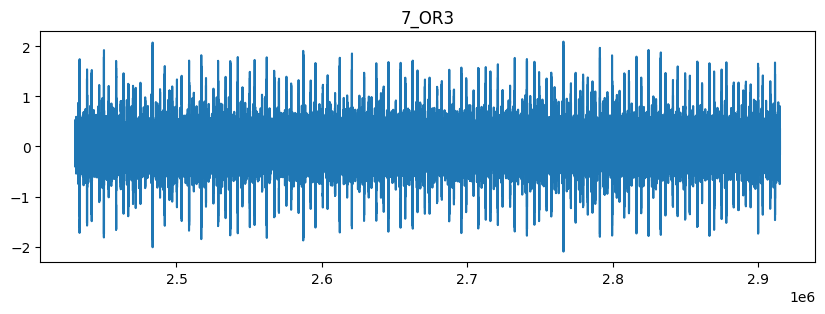

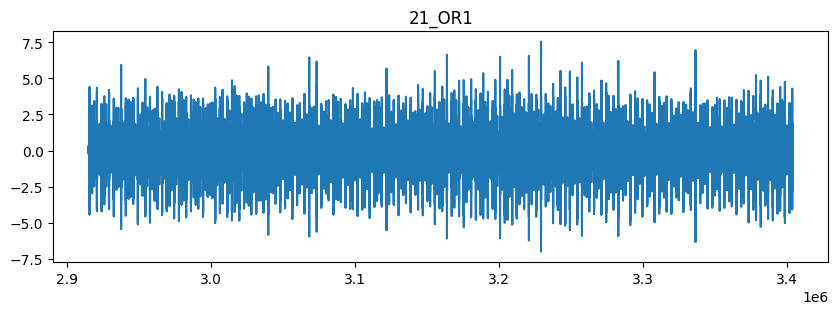

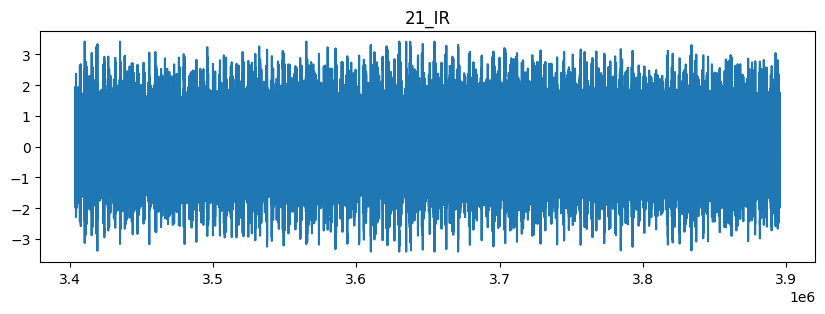

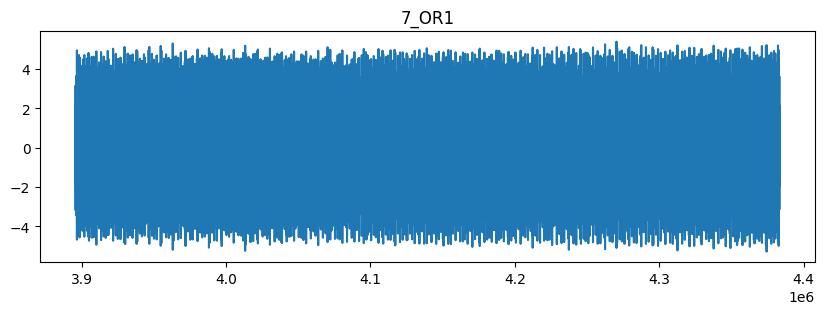

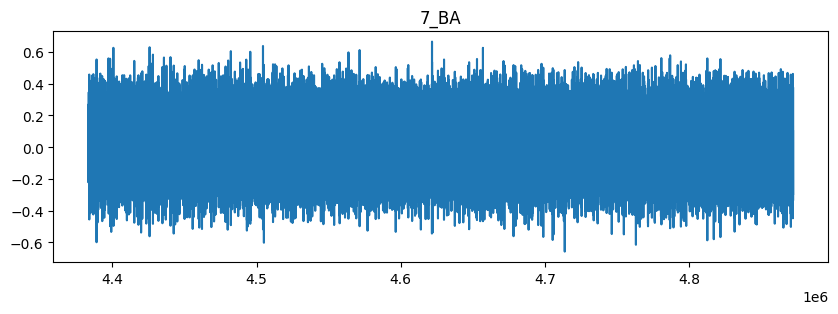

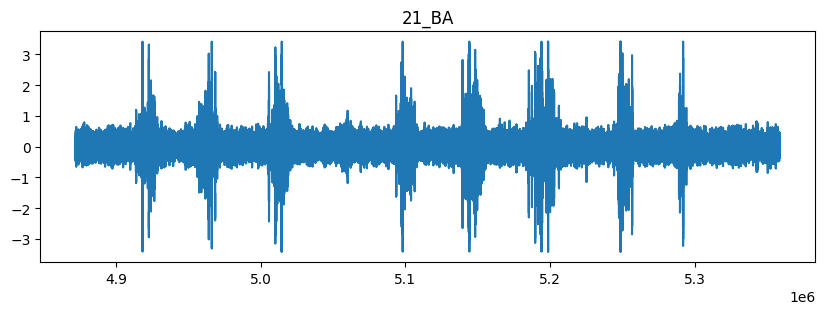

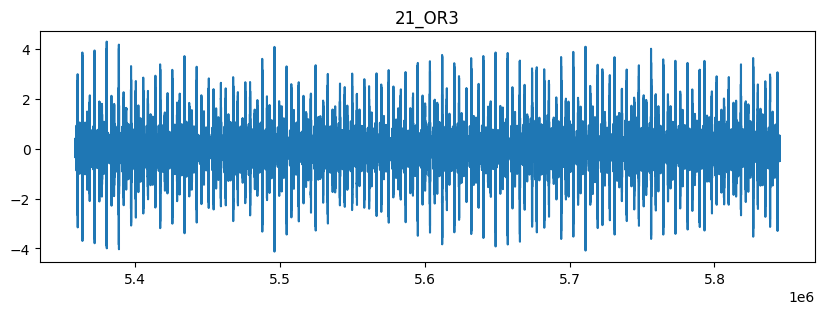

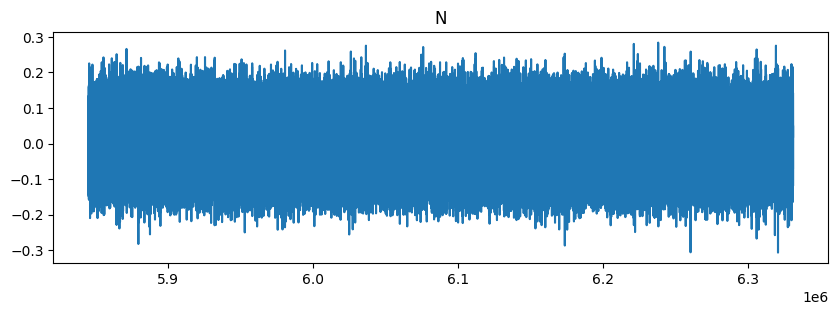

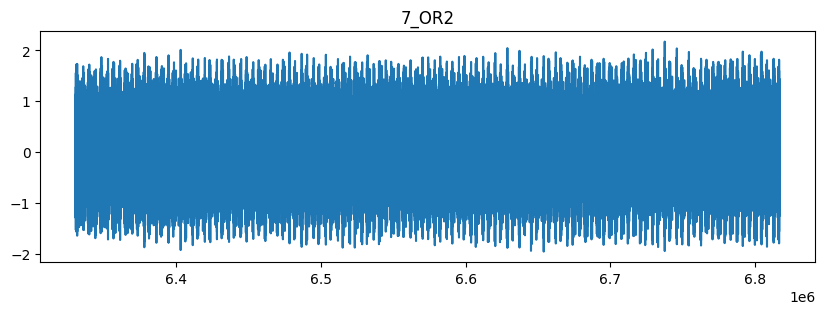

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

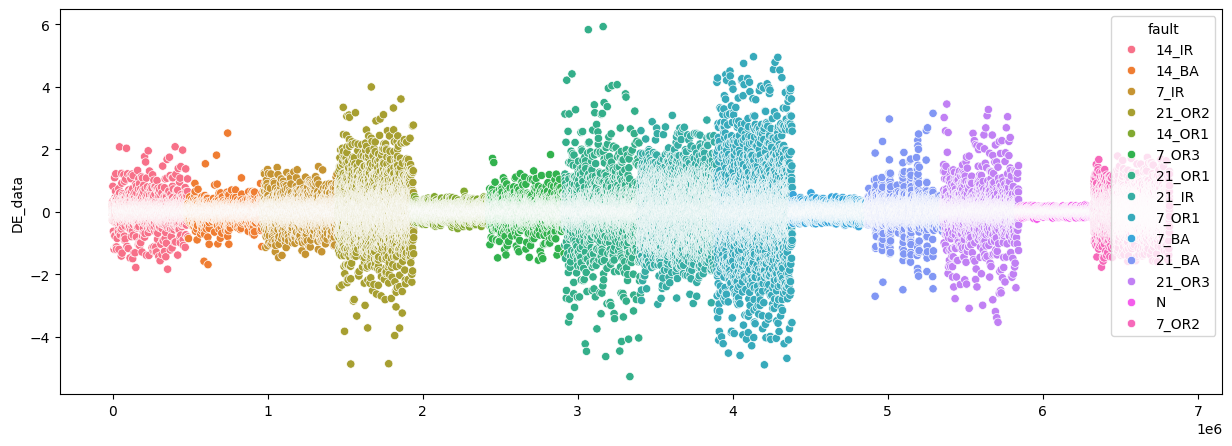

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [ ]:
# load=3

# df=pd.DataFrame(columns=['DE_data','fault'])

# for root, dirs, files in os.walk("{}hp_load_48_KHz".format(load), topdown=False):
#     for file_name in files:
#         path = os.path.join(root, file_name)
#         print(path)

#         mat = scipy.io.loadmat(path)

#         for k in list(mat.keys()):
#             if k[5:]== 'DE_time':
#                 key_name=k
#         DE_data = mat.get(key_name)
#         fault = np.full((len(DE_data), 1), file_name[:-4])

#         df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

#         df = pd.concat([df,df_temp],axis=0)
#         print(df['fault'].unique())

# df.to_csv('{}hp_all_faults.csv'.format(load),index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('3hp_all_faults.csv')
print(df)

          DE_data  fault
0        0.001252  14_IR
1       -0.028379  14_IR
2       -0.056340  14_IR
3       -0.057592  14_IR
4       -0.045907  14_IR
...           ...    ...
6816991 -0.322519  7_OR2
6816992 -0.493167  7_OR2
6816993 -0.578699  7_OR2
6816994 -0.570563  7_OR2
6816995 -0.459371  7_OR2

[6816996 rows x 2 columns]


Explanation:

The code initializes variables win_len and stride which define the length of the sliding window and the stride size, respectively.
Lists X and Y are initialized to store input data and output labels.
The code loops over unique fault types present in the DataFrame df.
Within the loop, it extracts data corresponding to each fault type and implements a sliding window approach to create overlapping segments of data with length win_len and stride stride.
It reshapes each segment of data to a single row and appends it to the list X.
Corresponding labels are appended to the list Y.
Finally, X and Y are converted to numpy arrays. The input data X is reshaped to match the expected input shape for a Convolutional Neural Network (CNN).
Output labels Y are encoded using LabelEncoder and then one-hot encoded using to_categorical function from Keras.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len = 784  # Length of the window
stride = 300   # Stride or step size

X = []  # List to store input data
Y = []  # List to store output labels

# Loop over unique fault types in the DataFrame
for k in df['fault'].unique():
    # Extract data for the current fault type
    df_temp_2 = df[df['fault'] == k]

    # Sliding window approach: sliding through the data
    for i in np.arange(0, len(df_temp_2) - (win_len), stride):
        # Extract a window of data of length 'win_len' and move 'stride' steps
        temp = df_temp_2.iloc[i:i + win_len, :-1].values
        temp = temp.reshape((1, -1))  # Reshape to a single row
        X.append(temp)  # Append the windowed data to X
        Y.append(df_temp_2.iloc[i + win_len, -1])  # Append the corresponding label to Y

# Convert X and Y to numpy arrays
X = np.array(X)
# Reshape X to match the expected input shape for a CNN (assuming grayscale images)
X = X.reshape((X.shape[0], 28, 28, 1))
# X = np.repeat(X, 3, axis=3)  # To repeat into 3-channel format (if needed for a CNN)

Y = np.array(Y)

# Encode the output labels using LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Perform one-hot encoding on the encoded labels
OHE_Y = to_categorical(encoded_Y)


In [ ]:
X.shape

(22695, 28, 28, 1)

In [ ]:
print

<function print>

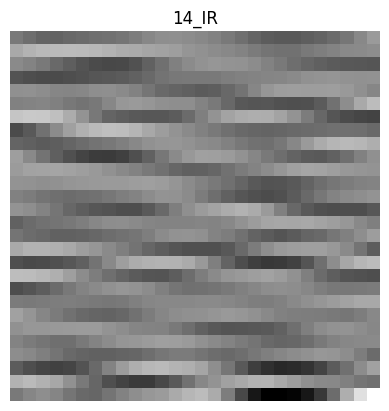

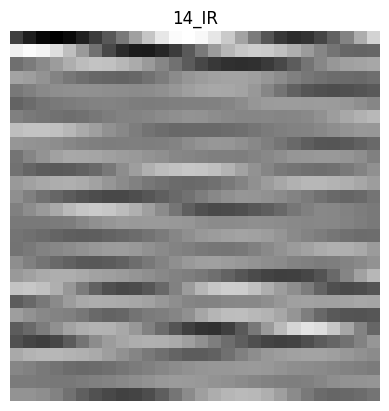

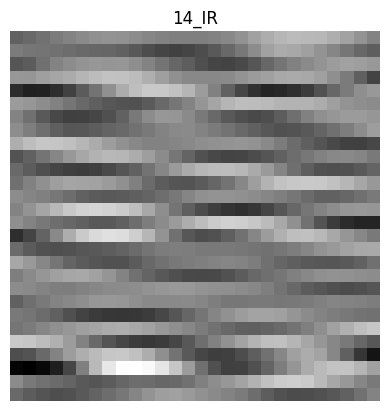

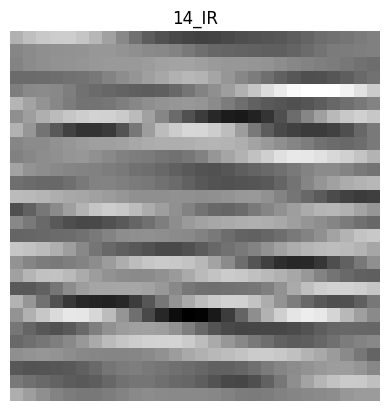

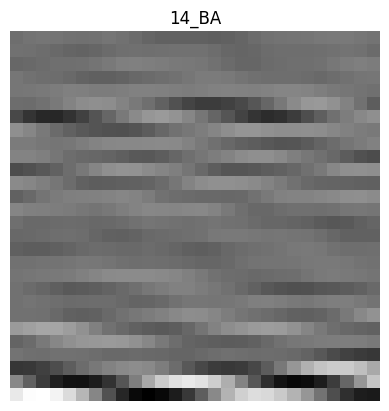

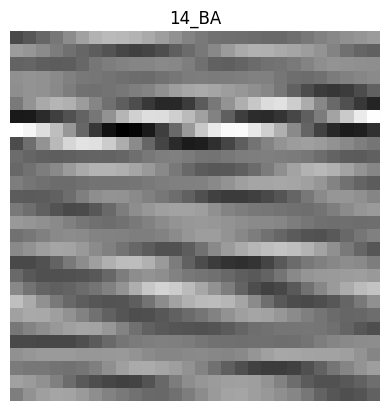

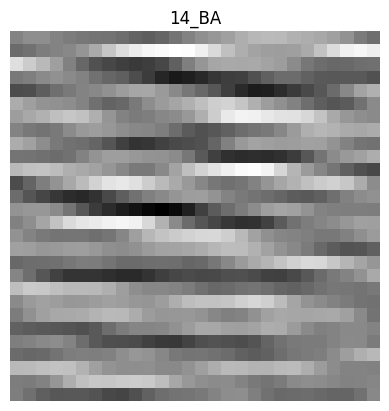

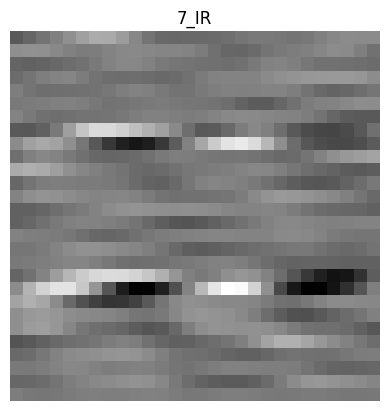

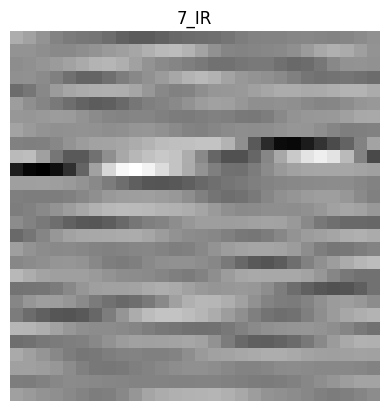

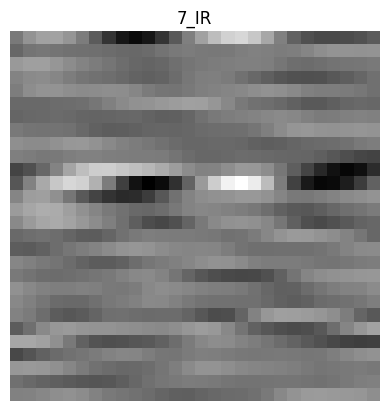

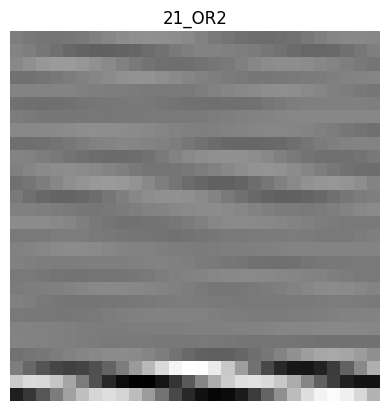

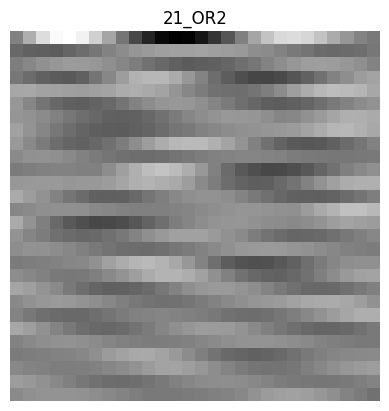

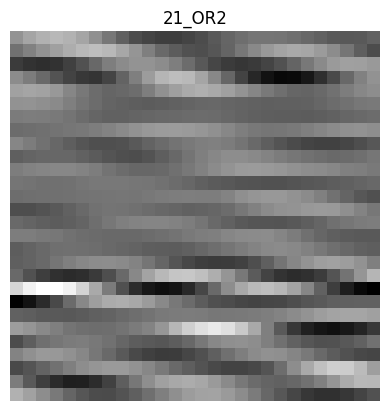

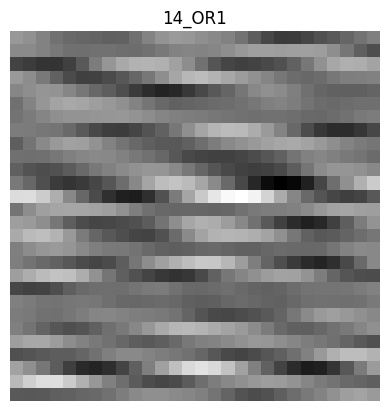

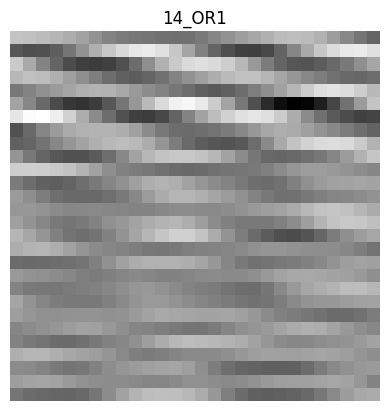

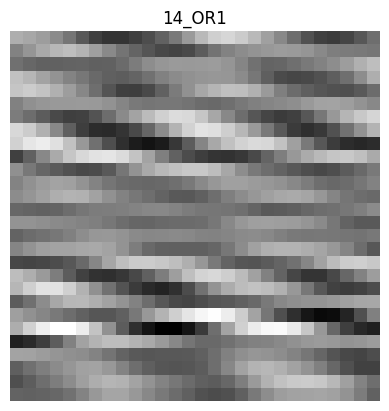

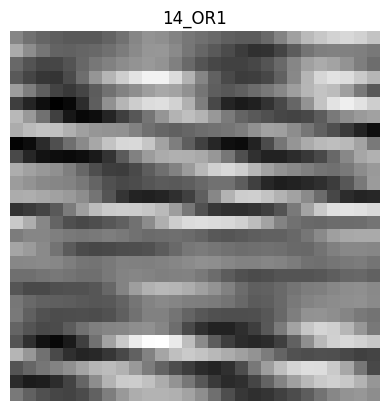

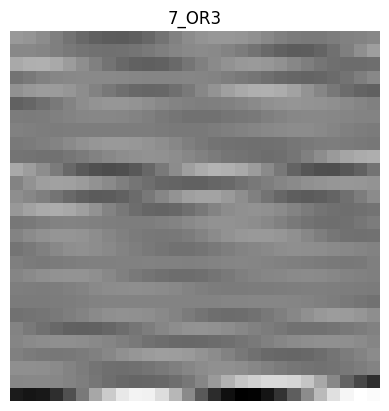

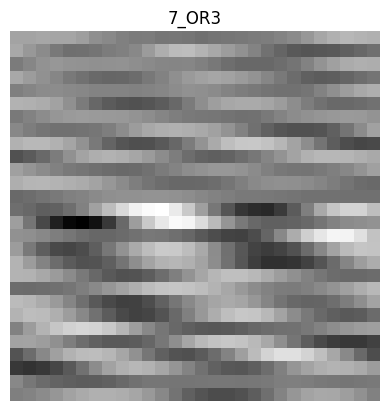

In [ ]:
from matplotlib.pyplot import imread


for idx in range(0,9244,500):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)


Explanation:

The code imports necessary modules from Keras to build the CNN model.
It determines the number of output classes based on the unique fault types present in the DataFrame df.
The CNN model is initialized as a sequential model.
Convolutional layers are added to extract features from the input data. Each convolutional layer is followed by a max pooling layer to reduce spatial dimensions.
The Flatten layer is added to convert the 2D feature maps into a 1D feature vector to be fed into the fully connected layers.
Fully connected layers are added to perform classification based on the extracted features.
The output layer uses softmax activation function to output probabilities for each class.
The summary of the model is printed to show the architecture and parameters.
The model is compiled specifying the loss function, optimizer, and evaluation metrics

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Determine the number of output classes
no_classes = len(df['fault'].unique())

# Define the architecture of the CNN model
cnn_model = Sequential()
# Add the first convolutional layer with 32 filters and a 3x3 kernel size, using ReLU activation function
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1), padding='same'))
# Add max pooling layer with a pool size of 2x2
cnn_model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

# Add the second convolutional layer with 64 filters and a 3x3 kernel size, using ReLU activation function
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Add max pooling layer with a pool size of 2x2
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Uncomment below lines if you want to add more convolutional layers
# cnn_model.add(Conv2D(128, (5, 3), activation='relu', padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=(5, 2), strides=(3, 3), padding='same'))

# Flatten the output from the convolutional layers to feed into fully connected layers
cnn_model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
cnn_model.add(Dense(128, activation='relu'))
# Add the output layer with number of neurons equal to the number of classes and softmax activation function
cnn_model.add(Dense(no_classes, activation='softmax'))

# Print the summary of the model
cnn_model.summary()

# Compile the model specifying loss function, optimizer, and metrics for evaluation
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
batch_size =200
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
80/80 [==============================] - 30s 360ms/step - loss: 1.6715 - accuracy: 0.4507 - val_loss: 0.8821 - val_accuracy: 0.7399
Epoch 2/20
80/80 [==============================] - 21s 258ms/step - loss: 0.6398 - accuracy: 0.7958 - val_loss: 0.4439 - val_accuracy: 0.8631
Epoch 3/20
80/80 [==============================] - 25s 313ms/step - loss: 0.3978 - accuracy: 0.8703 - val_loss: 0.3501 - val_accuracy: 0.8822
Epoch 4/20
80/80 [==============================] - 21s 265ms/step - loss: 0.3110 - accuracy: 0.8937 - val_loss: 0.2936 - val_accuracy: 0.9004
Epoch 5/20
80/80 [==============================] - 34s 426ms/step - loss: 0.2370 - accuracy: 0.9197 - val_loss: 0.2408 - val_accuracy: 0.9153
Epoch 6/20
80/80 [==============================] - 25s 315ms/step - loss: 0.1993 - accuracy: 0.9365 - val_loss: 0.1812 - val_accuracy: 0.9404
Epoch 7/20
80/80 [==============================] - 22s 278ms/step - loss: 0.1808 - accuracy: 0.9386 - val_loss: 0.1660 - val_accuracy: 0.9440

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
y_pred_probabilities = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded labels back to categorical labels for the ground truth
y_true_categorical_cnn = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy_cnn = accuracy_score(y_true_categorical_cnn, y_pred_cnn)

# Generate classification report
report_cnn = classification_report(y_true_categorical_cnn, y_pred_cnn)

print("Accuracy for CNN:", accuracy_cnn)
print("Classification Report for CNN:\n", report_cnn)


213/213 [==============================] - 2s 11ms/step
Accuracy for CNN: 0.9631370245263622
Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       493
           1       0.98      0.91      0.94       491
           2       0.86      0.95      0.90       458
           3       0.91      0.93      0.92       487
           4       0.98      1.00      0.99       503
           5       0.95      0.99      0.97       476
           6       1.00      0.99      0.99       489
           7       0.96      0.96      0.96       472
           8       0.96      0.86      0.91       518
           9       0.99      1.00      1.00       496
          10       1.00      1.00      1.00       494
          11       0.98      1.00      0.99       491
          12       0.97      0.96      0.97       471
          13       1.00      1.00      1.00       470

    accuracy                           0.96      6809
   macro 

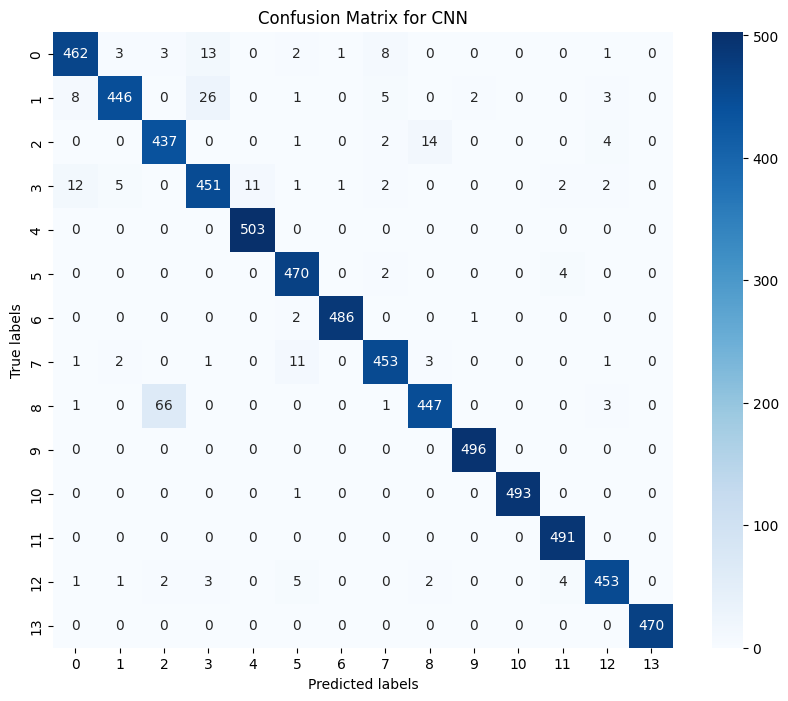

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix_cnn = confusion_matrix(y_true_categorical_cnn, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CNN')
plt.show()

# LSTM Model
Explanation:

The code imports necessary libraries and modules including numpy, scikit-learn, and Keras.
Data is split into training and testing sets using train_test_split() function from scikit-learn.
An LSTM model is defined using Sequential() from Keras. It consists of an LSTM layer with 64 units and an output layer with softmax activation function for classification.
The model is compiled specifying the optimizer, loss function, and evaluation metric.
The model is trained using fit() method by providing training data, labels, number of epochs, batch size, and validation data.
After training, the model is evaluated using the test data. Predictions are made on the test data using predict() method and converted back to categorical labels.
Accuracy is calculated using accuracy_score() from scikit-learn.
Classification report is generated using classification_report() from scikit-learn and printed.
User


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have preprocessed your data and have X (features) and OHE_Y (one-hot encoded labels)

# Split data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, OHE_Y, test_size=0.3, shuffle=True)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Output layer with softmax activation for classification

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Evaluate model
y_pred_lstm = np.argmax(model.predict(X_test_lstm), axis=-1)  # Predict classes for test data
y_test_categorical_lstm = np.argmax(y_test_lstm, axis=1)    # Convert one-hot encoded labels back to categorical
accuracy_lstm = accuracy_score(y_test_categorical_lstm, y_pred_lstm)  # Calculate accuracy
report_lstm = classification_report(y_test_categorical_lstm, y_pred_lstm, output_dict=True)  # Generate classification report

print("Accuracy:", accuracy_lstm)
print("Classification Report:\n", report_lstm)


Epoch 1/20
497/497 [==============================] - 16s 29ms/step - loss: 1.5789 - accuracy: 0.4423 - val_loss: 1.0454 - val_accuracy: 0.6328
Epoch 2/20
497/497 [==============================] - 21s 41ms/step - loss: 0.8197 - accuracy: 0.7052 - val_loss: 0.6210 - val_accuracy: 0.7778
Epoch 3/20
497/497 [==============================] - 15s 31ms/step - loss: 0.5048 - accuracy: 0.8169 - val_loss: 0.4114 - val_accuracy: 0.8484
Epoch 4/20
497/497 [==============================] - 11s 22ms/step - loss: 0.3741 - accuracy: 0.8671 - val_loss: 0.3382 - val_accuracy: 0.8832
Epoch 5/20
497/497 [==============================] - 13s 26ms/step - loss: 0.2853 - accuracy: 0.8991 - val_loss: 0.2644 - val_accuracy: 0.9075
Epoch 6/20
497/497 [==============================] - 9s 19ms/step - loss: 0.2305 - accuracy: 0.9211 - val_loss: 0.2174 - val_accuracy: 0.9250
Epoch 7/20
497/497 [==============================] - 12s 24ms/step - loss: 0.1790 - accuracy: 0.9412 - val_loss: 0.2037 - val_accuracy: 

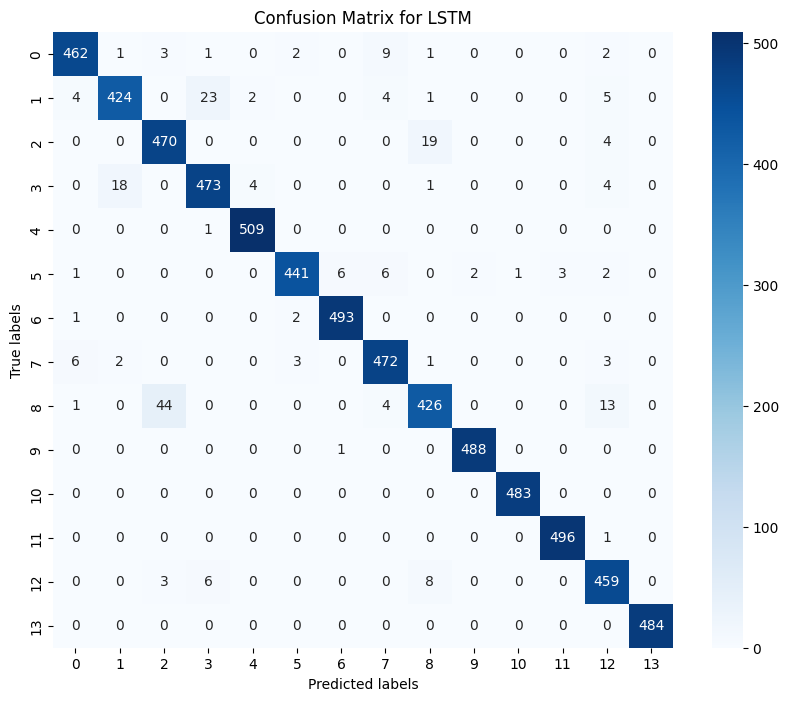

In [ ]:
# Generate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test_categorical_lstm, y_pred_lstm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LSTM')
plt.show()

# kNN  
Explanation:

The code imports necessary modules from scikit-learn (train_test_split, KNeighborsClassifier, accuracy_score, classification_report).
Data is split into training and testing sets using train_test_split() function.
The images are flattened to be compatible with the KNN classifier. This is done using the reshape() function.
A KNN classifier is initialized with 5 neighbors (you can adjust this number as needed).
The KNN classifier is trained on the flattened training data using the fit() method.
Predictions are made on the flattened test data using the predict() method.
Accuracy is calculated using accuracy_score() function.
Precision, recall, and F1-score are calculated using classification_report() function.
Accuracy and classification report are printed to evaluate the performance of the KNN classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, OHE_Y, test_size=0.3, shuffle=True)

# Flatten the images
X_train_flattened_knn = X_train_knn.reshape(X_train_knn.shape[0], -1)
X_test_flattened_knn = X_test_knn.reshape(X_test_knn.shape[0], -1)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn_classifier.fit(X_train_flattened_knn, y_train_knn)

# Predict on test set
y_pred_knn = knn_classifier.predict(X_test_flattened_knn)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

# Calculate precision, recall, and F1-score
report_knn = classification_report(y_test_knn, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)


Accuracy: 0.4883242766926127
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.33      0.36       510
           1       0.50      0.57      0.53       465
           2       0.67      0.49      0.56       498
           3       0.83      0.16      0.27       475
           4       1.00      0.90      0.94       475
           5       0.91      0.29      0.44       474
           6       0.98      0.09      0.17       474
           7       0.63      0.59      0.61       473
           8       0.49      0.21      0.29       473
           9       1.00      0.55      0.71       515
          10       0.99      0.93      0.96       501
          11       0.92      0.51      0.66       482
          12       0.61      0.21      0.32       506
          13       0.47      1.00      0.64       488

   micro avg       0.68      0.49      0.57      6809
   macro avg       0.74      0.49      0.53      6809
weighted avg       0.74    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


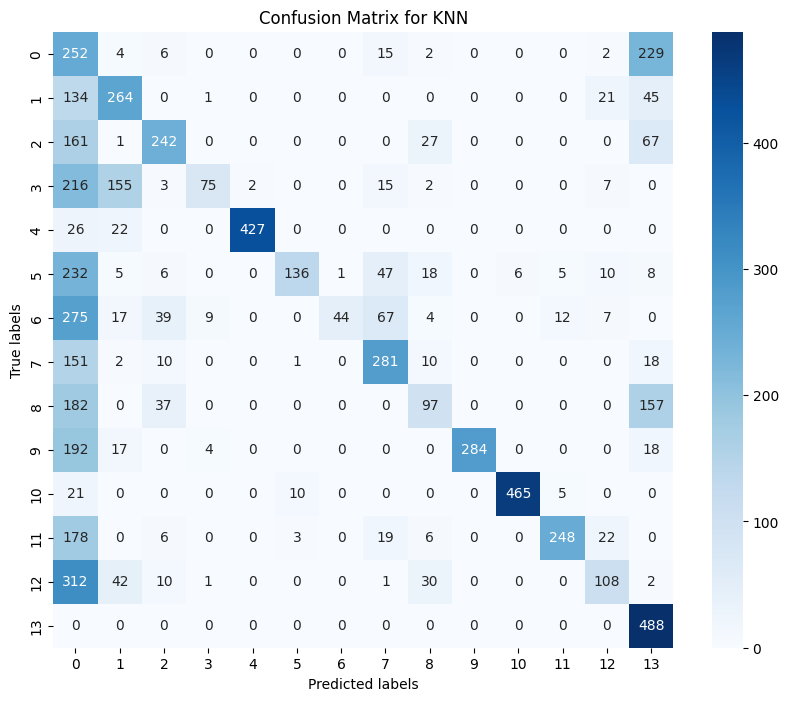

In [ ]:
# Plot confusion matrix
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test_knn.argmax(axis=1), y_pred_knn.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()

Explanation:

The code imports necessary modules from scikit-learn (train_test_split, StandardScaler, SVC, accuracy_score, classification_report).
Data is split into training and testing sets using train_test_split() function.
The images are flattened to be compatible with the SVM classifier. This is done using the reshape() function.
Feature scaling is applied to the flattened data using StandardScaler(). It ensures that all features have the same scale.
One-hot encoded labels are converted back to categorical labels using np.argmax().
An SVM classifier with radial basis function (RBF) kernel and default C parameter is initialized.
The SVM classifier is trained on the scaled training data using the fit() method.
Predictions are made on the scaled test data using the predict() method.
Accuracy is calculated using accuracy_score() function.
Precision, recall, and F1-score are calculated using classification_report() function.
Accuracy and classification report are printed to evaluate the performance of the SVM classifier.

## Support Vector Machine (SVM) classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, OHE_Y, test_size=0.3, shuffle=True)

# Flatten the images
X_train_flattened_svm = X_train_svm.reshape(X_train_svm.shape[0], -1)
X_test_flattened_svm = X_test_svm.reshape(X_test_svm.shape[0], -1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled_svm = scaler.fit_transform(X_train_flattened_svm)
X_test_scaled_svm = scaler.transform(X_test_flattened_svm)

# Convert one-hot encoded labels back to categorical labels
y_train_categorical_svm = np.argmax(y_train_svm, axis=1)
y_test_categorical_svm = np.argmax(y_test_svm, axis=1)

# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # Adjust the kernel and C parameter as needed
svm_classifier.fit(X_train_scaled_svm, y_train_categorical_svm)

# Predict on test set
y_pred_svm = svm_classifier.predict(X_test_scaled_svm)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_categorical_svm, y_pred_svm)

# Calculate precision, recall, and F1-score
report_svm = classification_report(y_test_categorical_svm, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)


Accuracy: 0.6845351740343663
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.41      0.29       483
           1       0.59      0.29      0.39       508
           2       0.56      0.53      0.54       510
           3       0.69      0.31      0.42       480
           4       0.97      0.99      0.98       528
           5       0.87      0.48      0.62       460
           6       0.89      0.85      0.87       463
           7       0.82      0.64      0.71       474
           8       0.45      0.48      0.47       514
           9       0.96      0.99      0.97       475
          10       0.83      1.00      0.91       458
          11       0.96      0.99      0.98       466
          12       0.47      0.64      0.54       470
          13       0.79      1.00      0.88       520

    accuracy                           0.68      6809
   macro avg       0.72      0.69      0.68      6809
weighted avg       0.72    

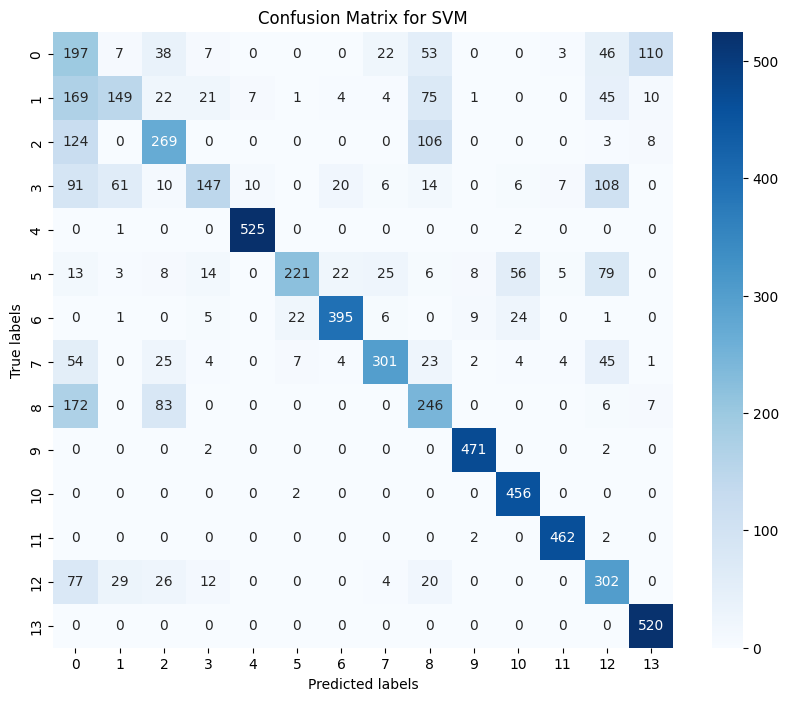

In [ ]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test_categorical_svm, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()

Obtaining Classification Reports: The code assumes that classification reports for SVM, LSTM, KNN, and CNN models have been obtained. The reports are dictionaries containing precision, recall, F1-score, and other metrics for each class.
Extracting Precision, Recall, and F1-score: A function extract_scores(report) is defined to extract precision, recall, and F1-score values for each class from the classification reports. This function iterates over each class (indexed from 0 to 13) and retrieves the corresponding metrics from the classification report.
Plotting Precision Scores: The code plots precision scores for each class using matplotlib.pyplot. It creates a figure with a specified size and then plots precision scores for SVM, LSTM, KNN, and CNN models against each class. Different colors are used for each model, and markers indicate the precision scores for each class.
Customizing Plot: Various properties of the plot such as title, labels for x and y axes, legend, and grid are customized to make the plot informative and visually appealing.
Displaying Plot: Finally, the plot is displayed using plt.show().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


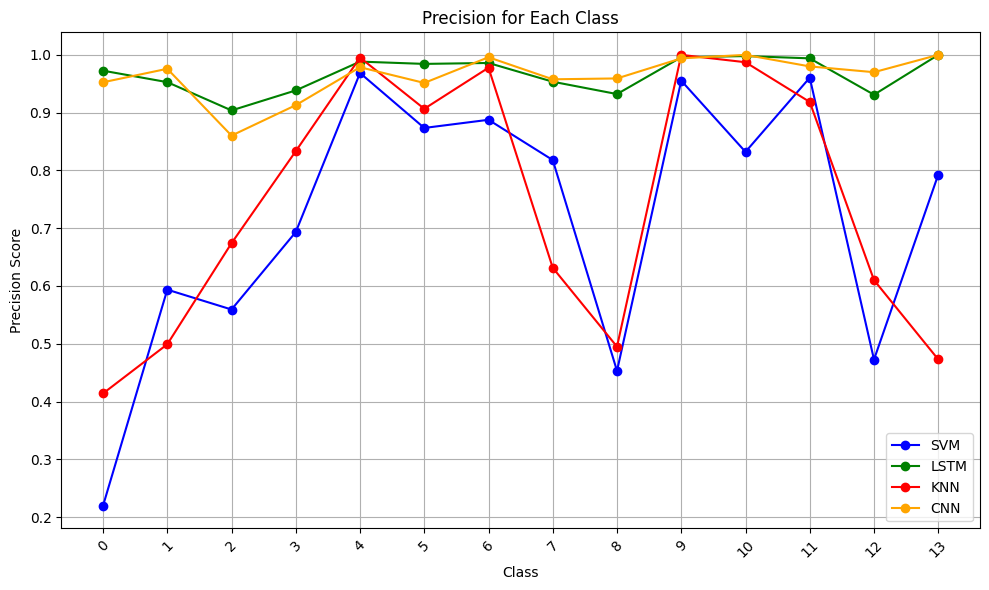

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have obtained classification reports for SVM, LSTM, and KNN models

# Classification reports for SVM, LSTM, and KNN
report_svm = classification_report(y_test_categorical_svm, y_pred_svm, output_dict=True)
report_lstm = classification_report(y_test_categorical_lstm, y_pred_lstm, output_dict=True)
report_knn = classification_report(y_test_knn, y_pred_knn, output_dict=True)
report_cnn = classification_report(y_true_categorical_cnn, y_pred_cnn, output_dict=True)

# Extracting precision, recall, and F1-score values for each class
def extract_scores(report):
    precision = [report[str(i)]['precision'] for i in range(14)]
    recall = [report[str(i)]['recall'] for i in range(14)]
    f1_score = [report[str(i)]['f1-score'] for i in range(14)]
    return precision, recall, f1_score

precision_svm, recall_svm, f1_score_svm = extract_scores(report_svm)
precision_lstm, recall_lstm, f1_score_lstm = extract_scores(report_lstm)
precision_knn, recall_knn, f1_score_knn = extract_scores(report_knn)
precision_cnn, recall_cnn, f1_score_cnn = extract_scores(report_cnn)

# Classes
classes = [str(i) for i in range(14)]

# Plot precision
plt.figure(figsize=(10, 6))
plt.plot(classes, precision_svm, marker='o', label='SVM', color='blue')
plt.plot(classes, precision_lstm, marker='o', label='LSTM', color='green')
plt.plot(classes, precision_knn, marker='o', label='KNN', color='red')
plt.plot(classes, precision_cnn, marker='o', label='CNN', color='orange')  # Add CNN
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


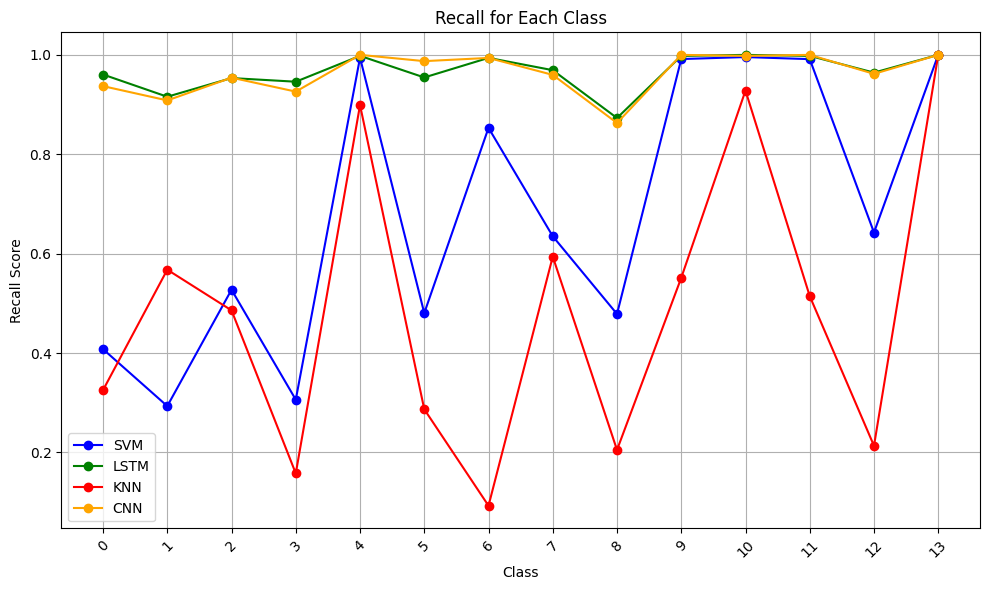

In [ ]:
# Plot recall
plt.figure(figsize=(10, 6))
plt.plot(classes, recall_svm, marker='o', label='SVM', color='blue')
plt.plot(classes, recall_lstm, marker='o', label='LSTM', color='green')
plt.plot(classes, recall_knn, marker='o', label='KNN', color='red')
plt.plot(classes, recall_cnn, marker='o', label='CNN', color='orange')  # Add CNN
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plot F1-score
plt.figure(figsize=(10, 6))
plt.plot(classes, f1_score_svm, marker='o', label='SVM', color='blue')
plt.plot(classes, f1_score_lstm, marker='o', label='LSTM', color='green')
plt.plot(classes, f1_score_knn, marker='o', label='KNN', color='red')
plt.plot(classes, f1_score_cnn, marker='o', label='CNN', color='orange')  # Add CNN
plt.title('F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


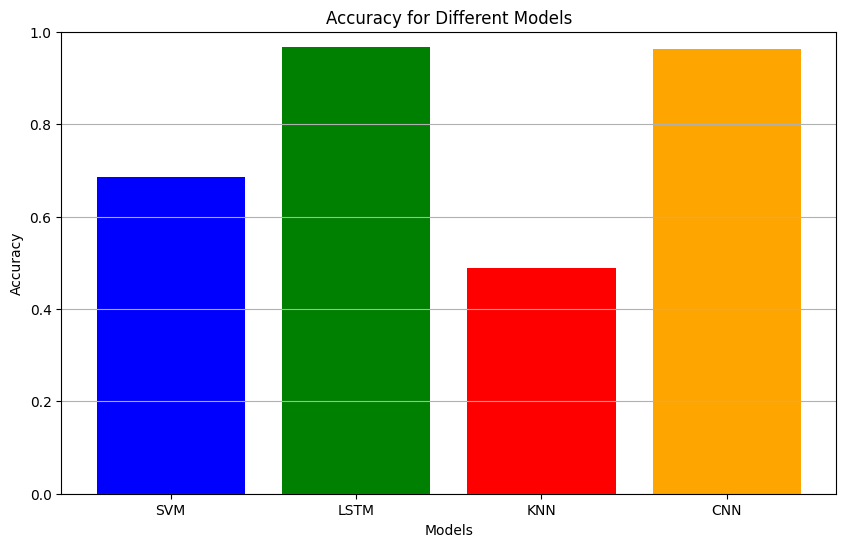

In [ ]:
# Accuracy plots
accuracies = [accuracy_svm, accuracy_lstm, accuracy_knn, accuracy_cnn]  # Add accuracy_cnn
models = ['SVM', 'LSTM', 'KNN', 'CNN']  # Add CNN

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])  # Add 'orange' for CNN
plt.title('Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



Explanation:

The code starts by importing necessary libraries.
raw_num and col_num represent the number of raw signals and the number of data points in each signal, respectively.
file_names is a list containing paths to the data files.
A class Data is defined to handle loading, preprocessing, and extracting labels from the data.
The get_data method within the Data class loads the data from .mat files, reshapes it, and concatenates it.
The get_label method extracts labels from file names and repeats them to match the shape of the data.
An instance of the Data class is created with file_names.
Data and labels are accessed from the instance.
LabelBinarizer from sklearn.preprocessing is used to convert labels into binary representation.
Wiener filtering from scipy.signal is applied to denoise the data.
Downsampling is performed by selecting every 8th data point from the denoised data.
Finally, the shape of the downsampled data is printed.

In [ ]:
import numpy as np
import os
import scipy.io
import re
import scipy.signal
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

raw_num = 240  # Number of raw signals
col_num = 2000  # Number of data points in each signal

# Define the filenames for the data files
file_names = [ '/content/drive/MyDrive/3hp_load_48_KHz/14_IR.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/14_BA.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/7_IR.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/21_OR2.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/14_OR1.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/7_OR3.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/21_OR1.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/21_IR.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/7_OR1.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/7_BA.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/21_BA.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/21_OR3.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/N.mat',
    '/content/drive/MyDrive/3hp_load_48_KHz/7_OR2.mat'
]

# Define a class to handle the data
class Data(object):

    def __init__(self, file_names):
        self.file_names = file_names
        self.data = self.get_data()  # Load and preprocess data
        self.label = self.get_label()  # Get corresponding labels

    # Method to load and preprocess data
    def get_data(self):
        data = None
        # Iterate over each file
        for file_name in self.file_names:
            # Load .mat file
            file = scipy.io.loadmat(file_name)
            # Iterate over keys in the loaded .mat file
            for k in file.keys():
                # Match keys with a specific pattern (X followed by 3 digits followed by _DE_time)
                file_matched = re.match('X\d{3}_DE_time', k)
                if file_matched:
                    key = file_matched.group()
            # Reshape and concatenate data from each file
            if data is None:
                data = np.array(file[key][0:480000].reshape(raw_num, col_num))
            else:
                data = np.vstack((data, file[key][0:480000].reshape((raw_num, col_num))))
        return data

    # Method to extract labels from file names
    def get_label(self):
        # Extract file names without extension
        title = np.array([os.path.basename(file_name).replace('.mat', '') for file_name in self.file_names])
        # Reshape the array to a column vector
        label = title[:, np.newaxis]
        label_copy = np.copy(label)
        # Repeat each label raw_num times to match the data shape
        for _ in range(raw_num-1):
            label = np.hstack((label, label_copy))
        return label.flatten()

# Instantiate the Data object
data_object = Data(file_names)

# Access data and label attributes
data = data_object.data
label = data_object.label

# Instantiate LabelBinarizer to convert labels into binary representation
lb = LabelBinarizer()
y = lb.fit_transform(label)

# Wiener filtering to denoise the data
data_wiener = scipy.signal.wiener(data, mysize=3, noise=None)

# Downsampling by selecting every 8th data point
index = np.arange(0, 2000, 8)
data_samp = data_wiener[:, index]
print(data_samp.shape)  # Print the shape of the downsampled data


(3360, 250)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_samp, y, test_size=0.3)

Explanation:

The code defines a neural network model using Keras functional API.
The model consists of two encoder branches followed by a decoder.
Each encoder branch comprises convolutional layers followed by max-pooling layers.
The outputs of the two encoder branches are multiplied element-wise to capture interactions.
The decoder consists of LSTM layers followed by dropout and dense layers.
The model is built, compiled, and its summary is printed.

In [ ]:
from tensorflow.keras.layers import Input, Reshape, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def built_model():
    input_seq = Input(shape=(250,))  # Define input shape for the sequence data
    X = Reshape((250, 1))(input_seq)  # Reshape input for compatibility with 1D convolution

    # First encoder branch
    ec1_layer1 = Conv1D(filters=50, kernel_size=20, strides=2, padding='valid', activation='tanh')(X)
    ec1_layer2 = Conv1D(filters=30, kernel_size=10, strides=2, padding='valid', activation='tanh')(ec1_layer1)
    ec1_outputs = MaxPooling1D(pool_size=2, strides=None, padding='valid')(ec1_layer2)

    # Second encoder branch
    ec2_layer1 = Conv1D(filters=50, kernel_size=6, strides=1, padding='valid', activation='tanh')(X)
    ec2_layer2 = Conv1D(filters=40, kernel_size=6, strides=1, padding='valid', activation='tanh')(ec2_layer1)
    ec2_layer3 = MaxPooling1D(pool_size=2, strides=None, padding='valid')(ec2_layer2)
    ec2_layer4 = Conv1D(filters=30, kernel_size=6, strides=1, padding='valid', activation='tanh')(ec2_layer3)
    ec2_layer5 = Conv1D(filters=30, kernel_size=6, strides=2, padding='valid', activation='tanh')(ec2_layer4)
    ec2_outputs = MaxPooling1D(pool_size=2, strides=None, padding='valid')(ec2_layer5)

    # Multiplicative interaction between the outputs of two encoder branches
    encoder = multiply([ec1_outputs, ec2_outputs])

    # Decoder
    dc_layer1 = LSTM(60, return_sequences=True)(encoder)  # LSTM layer with 60 units
    dc_layer2 = LSTM(60)(dc_layer1)  # LSTM layer with 60 units
    dc_layer3 = Dropout(0.5)(dc_layer2)  # Dropout layer with dropout rate of 0.5
    dc_layer4 = Dense(1)(dc_layer3)  # Dense layer for regression output without activation

    # Define the model
    model = Model(input_seq, dc_layer4)

    return model

# Build the model
model = built_model()

# Compile the model
opt = Adam(learning_rate=0.06)  # Define Adam optimizer with learning rate of 0.06
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])  # Compile model with MSE loss and accuracy metric

# Print model summary
model.summary()  # Print summary of the model architecture


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 250)]                0         []                            
                                                                                                  
 reshape (Reshape)           (None, 250, 1)               0         ['input_1[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 245, 50)              350       ['reshape[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 240, 40)              12040     ['conv1d_2[0][0]']            
                                                                                              

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=100, epochs=20,
                    verbose=2, validation_data=(X_test, y_test),
                    shuffle=True, initial_epoch=0)

Epoch 1/20
24/24 - 12s - loss: 0.0855 - accuracy: 0.9249 - val_loss: 0.0663 - val_accuracy: 0.9286 - 12s/epoch - 486ms/step
Epoch 2/20
24/24 - 10s - loss: 0.0698 - accuracy: 0.9286 - val_loss: 0.0664 - val_accuracy: 0.9286 - 10s/epoch - 398ms/step
Epoch 3/20
24/24 - 4s - loss: 0.0675 - accuracy: 0.9286 - val_loss: 0.0663 - val_accuracy: 0.9286 - 4s/epoch - 178ms/step
Epoch 4/20
24/24 - 6s - loss: 0.0669 - accuracy: 0.9286 - val_loss: 0.0664 - val_accuracy: 0.9286 - 6s/epoch - 239ms/step
Epoch 5/20
24/24 - 9s - loss: 0.0667 - accuracy: 0.9286 - val_loss: 0.0664 - val_accuracy: 0.9286 - 9s/epoch - 372ms/step
Epoch 6/20
24/24 - 4s - loss: 0.0665 - accuracy: 0.9286 - val_loss: 0.0663 - val_accuracy: 0.9286 - 4s/epoch - 177ms/step
Epoch 7/20
24/24 - 6s - loss: 0.0664 - accuracy: 0.9286 - val_loss: 0.0663 - val_accuracy: 0.9286 - 6s/epoch - 229ms/step
Epoch 8/20
24/24 - 5s - loss: 0.0664 - accuracy: 0.9286 - val_loss: 0.0663 - val_accuracy: 0.9286 - 5s/epoch - 219ms/step
Epoch 9/20
24/24 - 4

In [ ]:
y_pre = model.predict(X_test)
y_pre

32/32 [==============================] - 1s 37ms/step


array([[0.07259795],
       [0.07187435],
       [0.0718495 ],
       ...,
       [0.07343818],
       [0.07189777],
       [0.07189777]], dtype=float32)

In [ ]:
y_test


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import numpy as np

# Compute maximum values from y_test and y_pred
max_values = np.amax(y_test, axis=1, keepdims=True)



threshold = 0.0713  # Example threshold
y_pred_binary = (y_pre > threshold).astype(int)

# Calculate accuracy after updating y_test and y_pred
accuracy_max = accuracy_score(max_values, y_pred_binary)

print("Accuracy with maximum values:", accuracy_max)

Accuracy with maximum values: 1.0


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, f1_score, recall_score
precision = precision_score(max_values, y_pred_binary)

# Calculate F1-score
f1 = f1_score(max_values, y_pred_binary)

# Calculate recall
recall = recall_score(max_values, y_pred_binary)

print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)

Precision: 1.0
F1 Score: 1.0
Recall: 1.0


In [ ]:
y_test_categorical_svm = np.argmax(y_test_svm, axis=1)

In [ ]:
report_cnn_lstm = classification_report(max_values, y_pred_binary , output_dict=True)

# Extracting precision, recall, and F1-score values for each class
report_cnn_lstm

{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1008},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1008},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1008}}

In [ ]:
def extract_scores(report):
    precision = []
    recall = []
    f1_score = []
    for i in range(1, 15):
        key = str(i)
        if key in report:
            precision.append(report[key]['precision'])
            recall.append(report[key]['recall'])
            f1_score.append(report[key]['f1-score'])
    return precision, recall, f1_score



In [ ]:
precision_cnn_lstm, recall_cnn_lstm, f1_score_cnn_lstm = extract_scores(report_cnn_lstm)


In [ ]:
precision_cl = []  # Initialize an empty li
precision_cl = [precision_cnn_lstm[0]] * 14

In [ ]:
recall_cl = []  # Initialize an empty li
recall_cl = [recall_cnn_lstm[0]] * 14

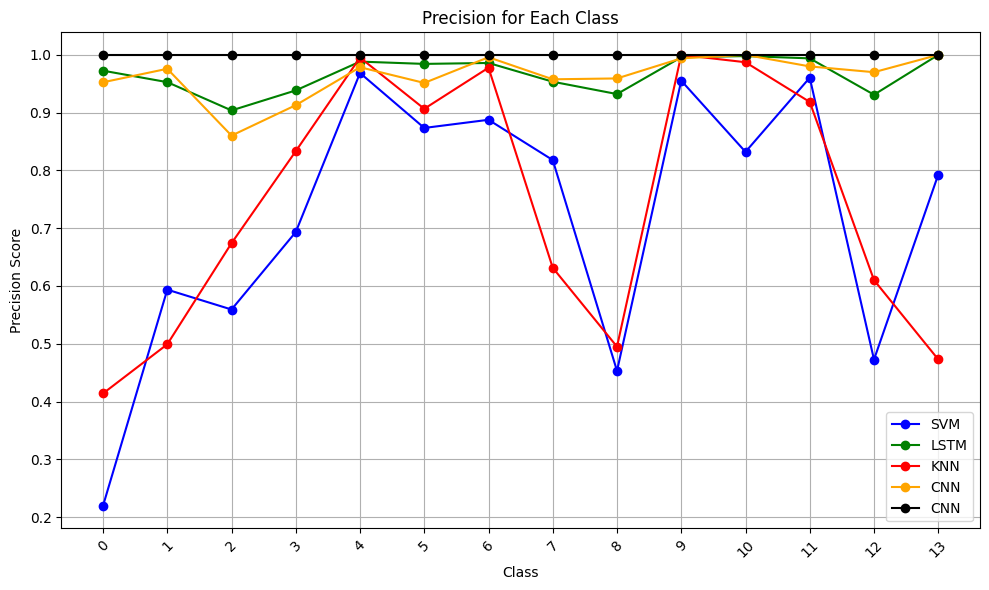

In [ ]:
# Plot precision
plt.figure(figsize=(10, 6))
plt.plot(classes, precision_svm, marker='o', label='SVM', color='blue')
plt.plot(classes, precision_lstm, marker='o', label='LSTM', color='green')
plt.plot(classes, precision_knn, marker='o', label='KNN', color='red')
plt.plot(classes, precision_cnn, marker='o', label='CNN', color='orange')
plt.plot(classes, precision_cl, marker='o', label='CNN', color='black') # Add CNN
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

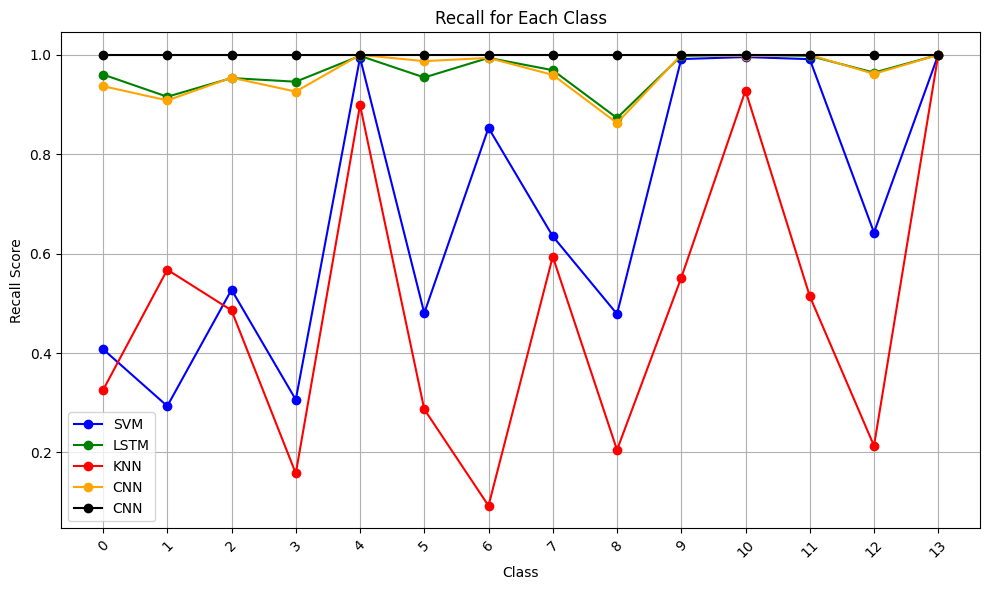

In [ ]:
# Plot recall
plt.figure(figsize=(10, 6))
plt.plot(classes, recall_svm, marker='o', label='SVM', color='blue')
plt.plot(classes, recall_lstm, marker='o', label='LSTM', color='green')
plt.plot(classes, recall_knn, marker='o', label='KNN', color='red')
plt.plot(classes, recall_cnn, marker='o', label='CNN', color='orange')
plt.plot(classes, recall_cl, marker='o', label='CNN', color='black')   # Add CNN
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
